# Exploring results (corrected MD maps with FreeSurfer ventricular volumes)

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
paramtype = 'MD_corr'
analysis_name='%s_w_FS_ventvol'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20161219', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmatrix3.xls'
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/SPM.mat']


In [6]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.original_version(paramtype, excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmatrix3.xls looking up column MD_corr ...
Analysis name: MD_corr_w_FS_ventvol
Columns used in the model: ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4', 'age23', 'age24', 'age33', 'age34', 'age44', 'agesq23', 'agesq24', 'agesq33', 'agesq34', 'agesq44', 'Gender(0=female)', 'Years of Education']
Analysis name: MD_corr_w_FS_ventvol
Scans (513): [u'/home/grg/spm/MD_corr/10070_MD_corr.nii', u'/home/grg/spm/MD_corr/10102_MD_corr.nii', u'/home/grg/spm/MD_corr/10108_MD_corr.nii', u'/home/grg/spm/MD_corr/10235_MD_corr.nii', u'/home/grg/spm/MD_corr/10365_MD_corr.nii', u'/home/grg/spm/MD_corr/10419_MD_corr.nii', u'/home/grg/spm/MD_corr/10463_MD_corr.nii', u'/home/grg/spm/MD_corr/10530_MD_corr.nii', u'/home/grg/spm/MD_corr/10551_MD_corr.nii', u'/home/grg/spm/MD_corr/10563_MD_corr.nii', u'/home/grg/spm/MD_corr/10576_MD_corr.nii', u'/home/grg/spm/MD_corr/10630_MD_corr.nii', u'/home/grg/spm/MD_corr/10668_MD_corr.nii', u'/home/grg/spm/MD_corr/10692_MD_corr.nii', u'/

NameError: name 'pd' is not defined

/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0006.nii


/home/grg/jupyter/local/lib/python2.7/site-packages/nilearn/plotting/displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0007.nii
/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0008.nii
/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0009.nii
/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0010.nii
/home/grg/spm/analysis_20161219/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0011.nii


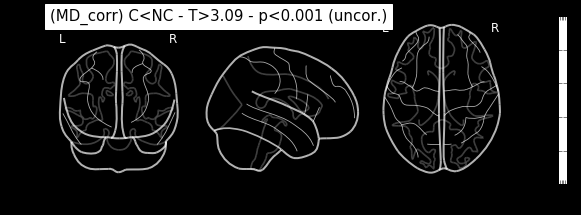

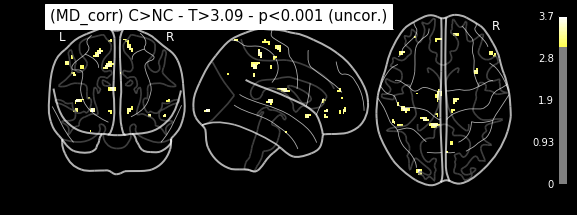

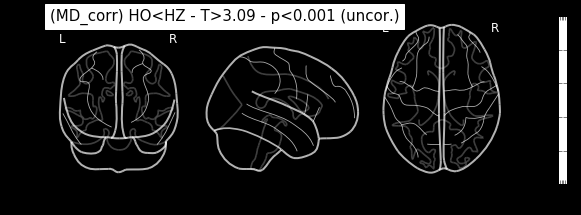

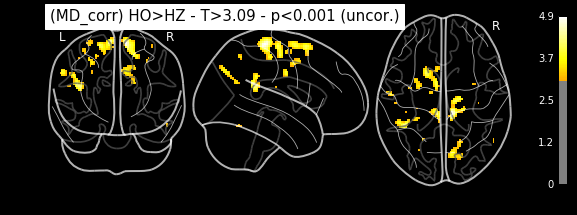

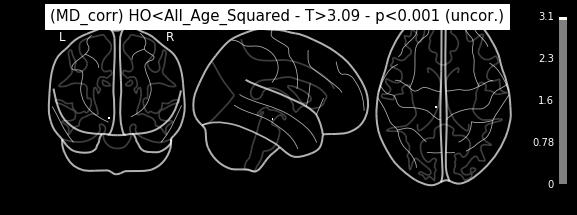

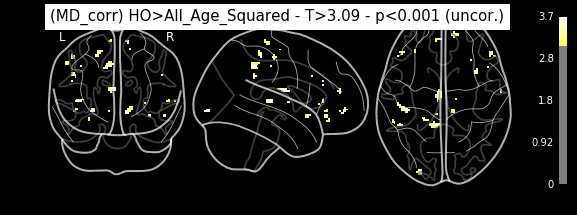

In [7]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0006.nii
Saving to... /tmp/tmpwaeZAm.png
/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0007.nii
Saving to... /tmp/tmpqzLIuA.png
/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0008.nii
Saving to... /tmp/tmp651eFV.png
/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0009.nii
Saving to... /tmp/tmpkkM7K0.png
/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0010.nii
Saving to... /tmp/tmpTKDIHh.png
/home/grg/spm/analysis/MD_corr_w_FS_ventvol/estimatecontrasts/spmT_0011.nii
Saving to... /tmp/tmp2ghKv3.png


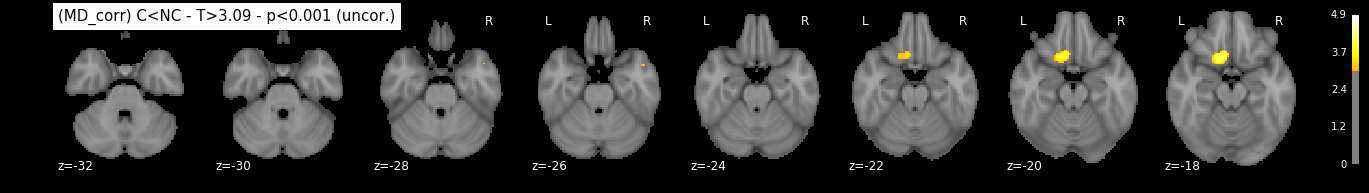

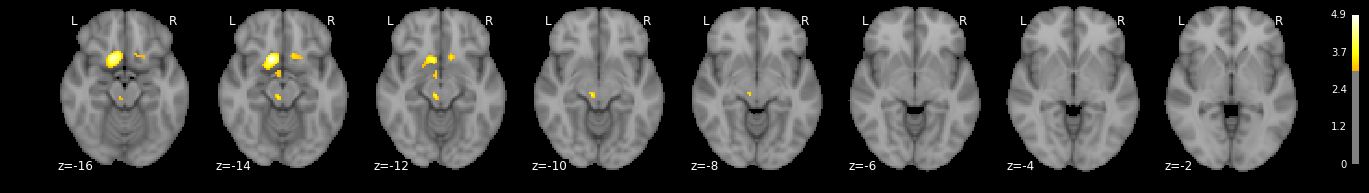

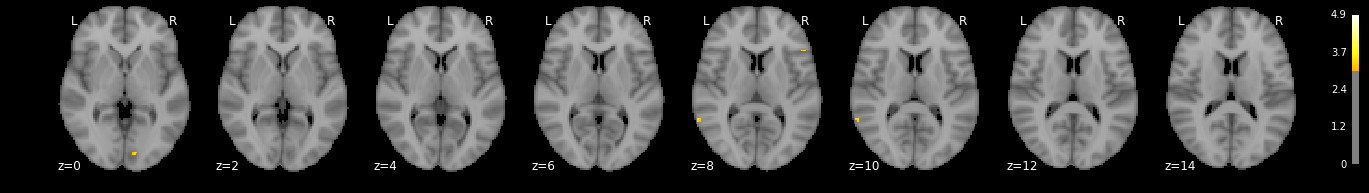

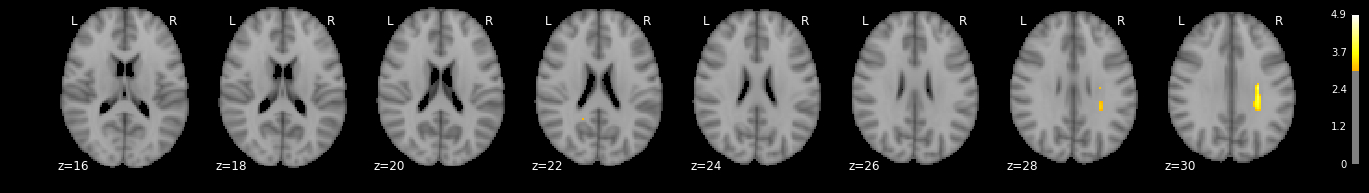

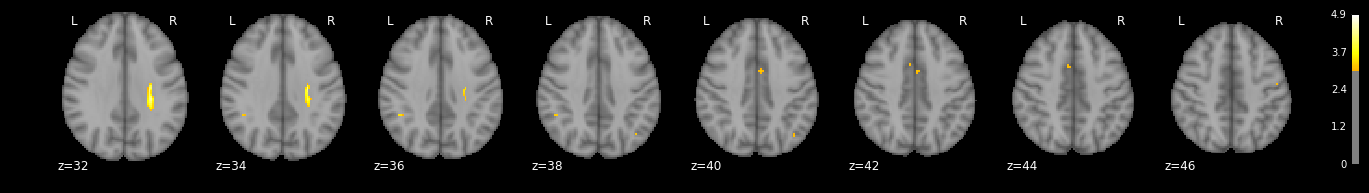

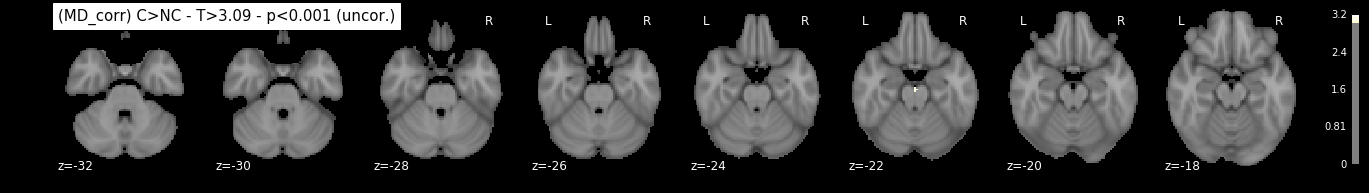

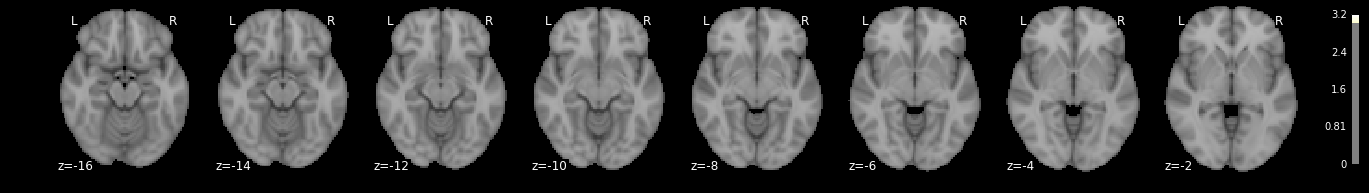

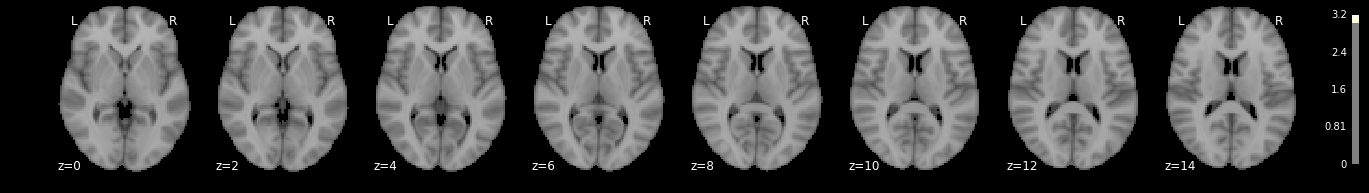

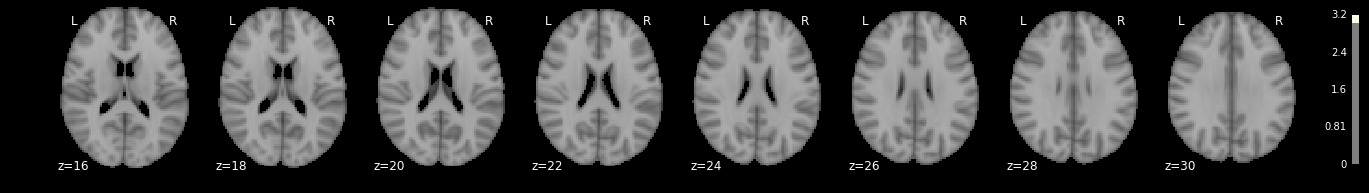

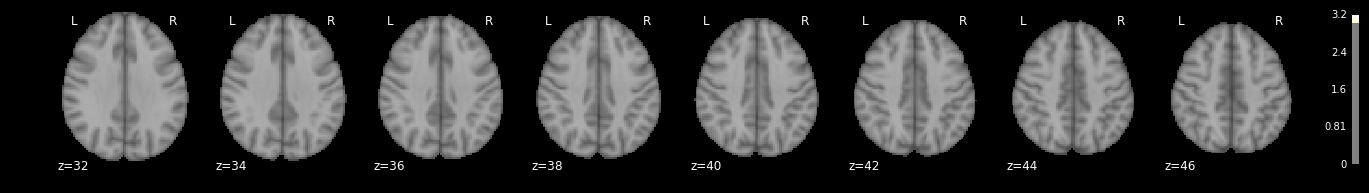

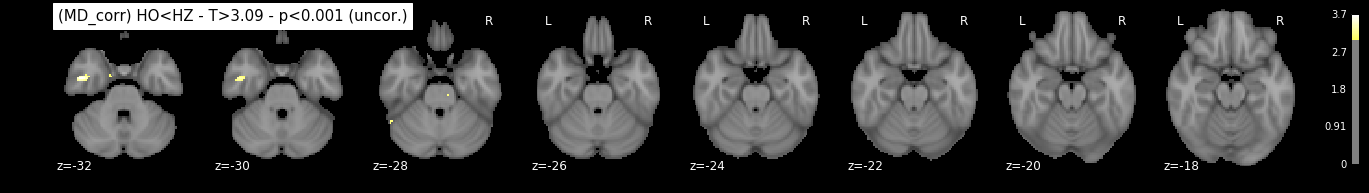

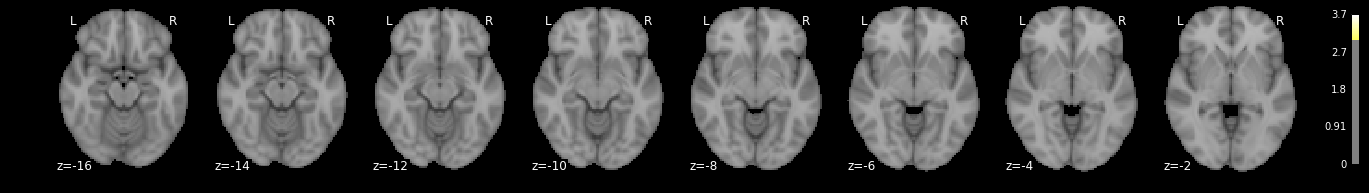

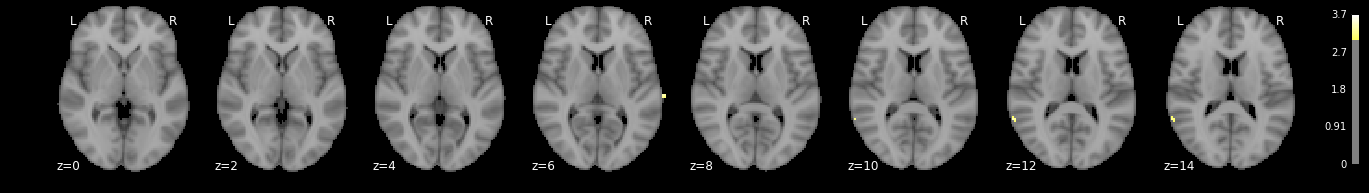

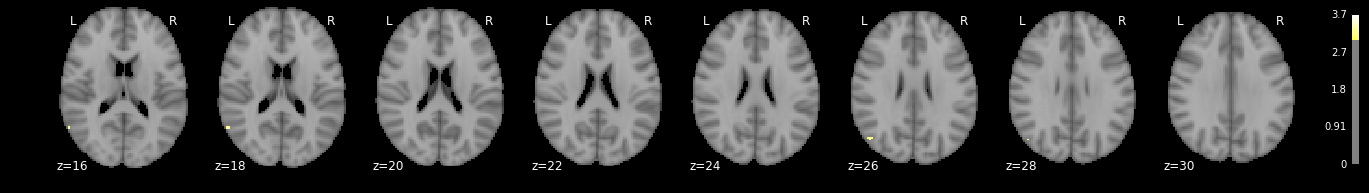

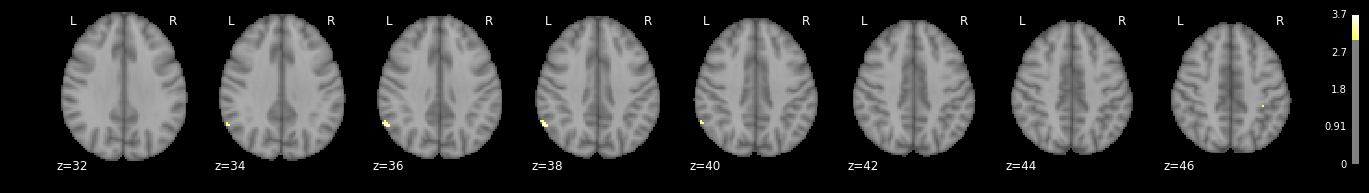

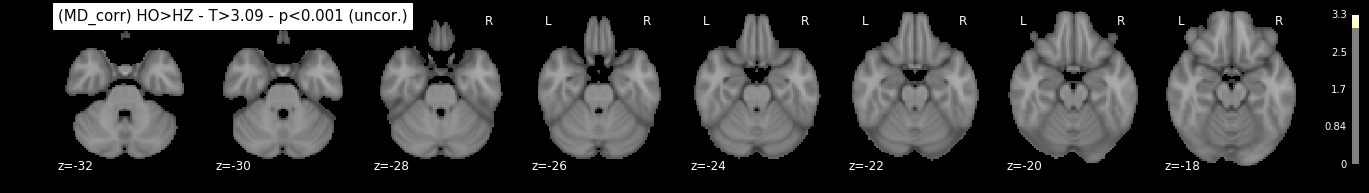

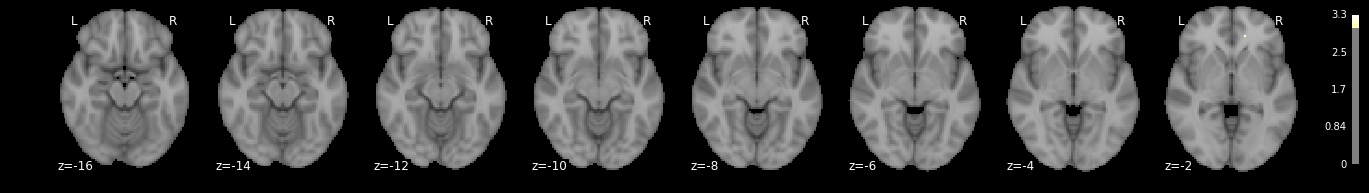

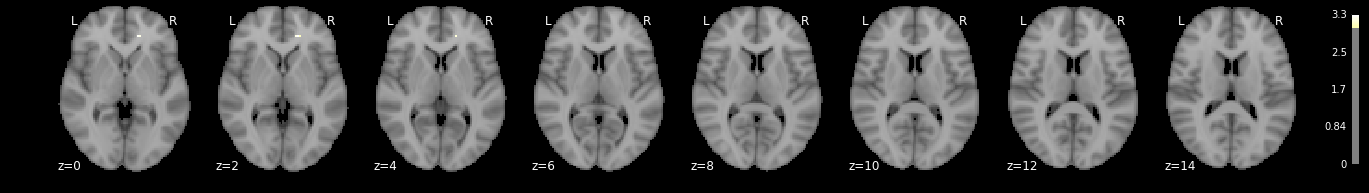

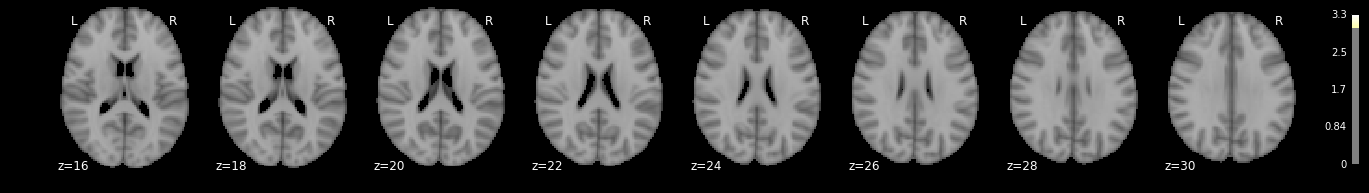

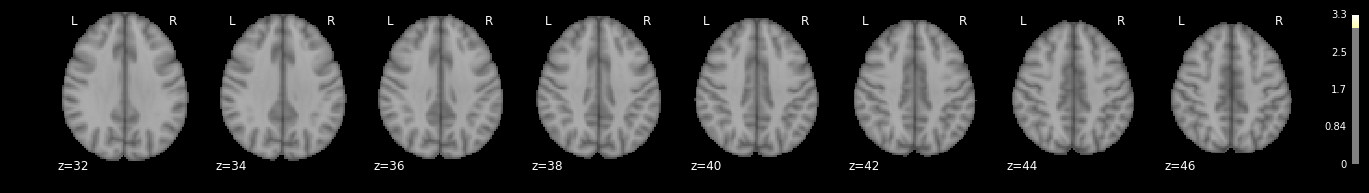

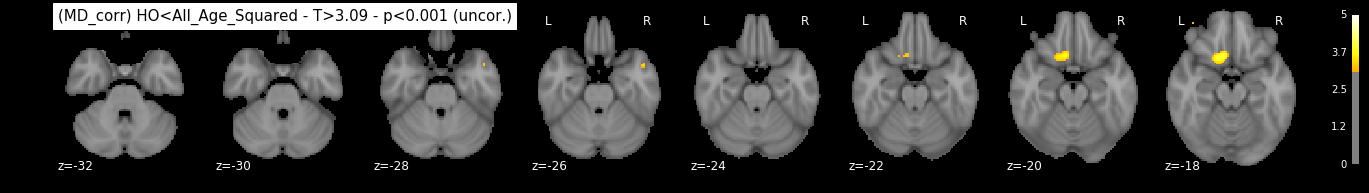

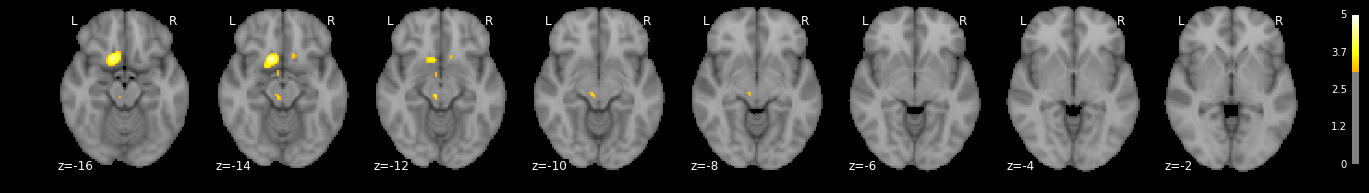

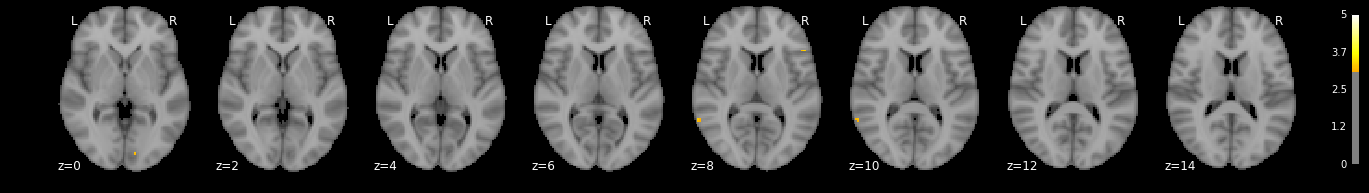

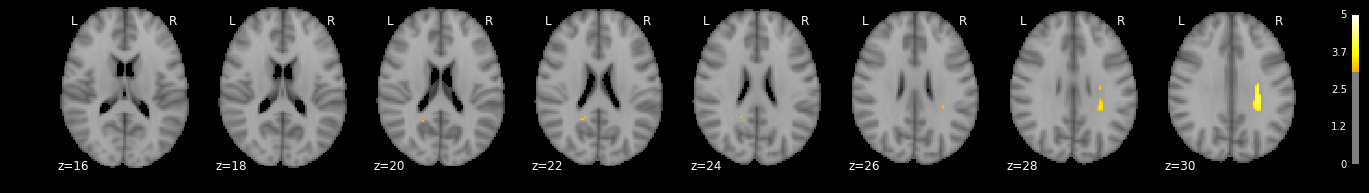

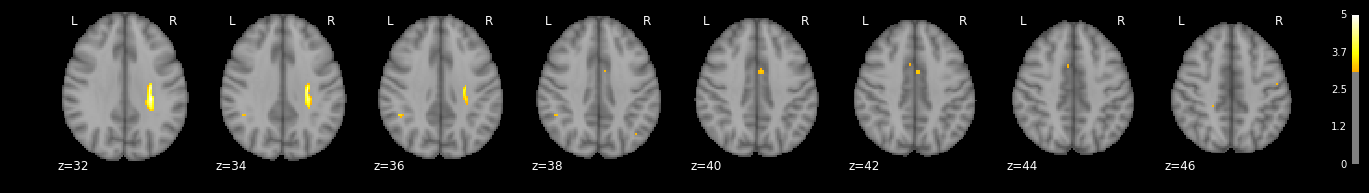

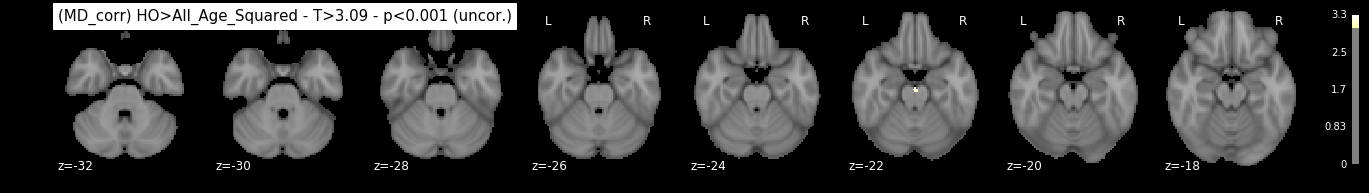

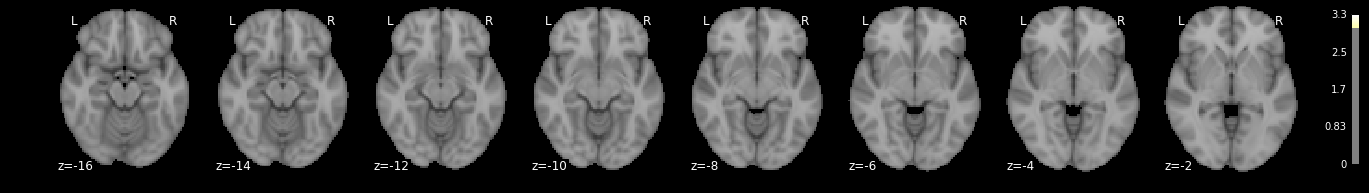

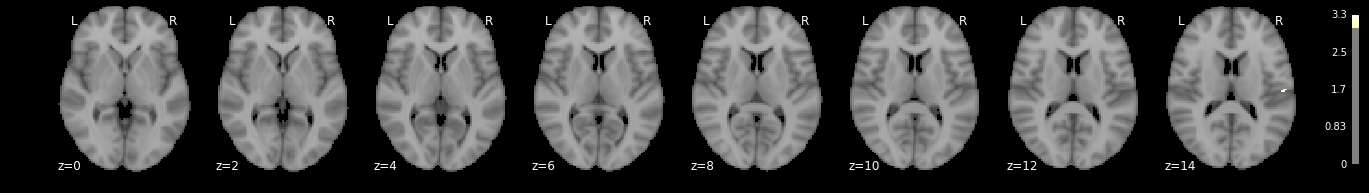

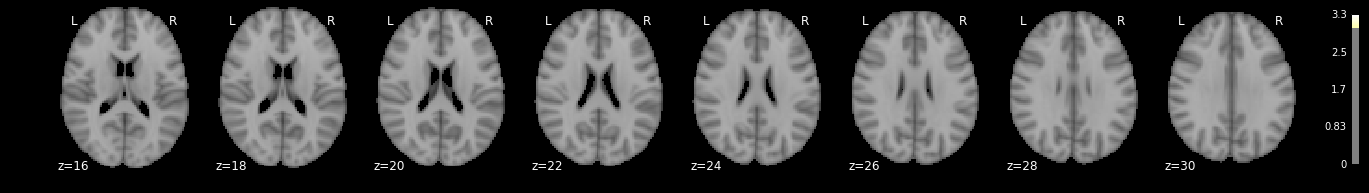

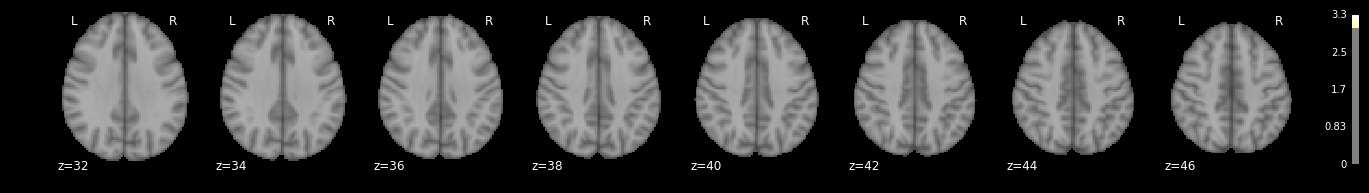

In [14]:
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()